# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

In [1]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
housing = load_boston() # Loading the housing data
housing

/media/sagalpreet/Data/Sagal/Coursework/IIT-Ropar/Sem-6/ML/2019/assignments/Machine-Learning-CS503/assignment-3/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
   

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
# Exploratory Analysis
analysis = data.describe()
analysis.columns = housing["feature_names"]
analysis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


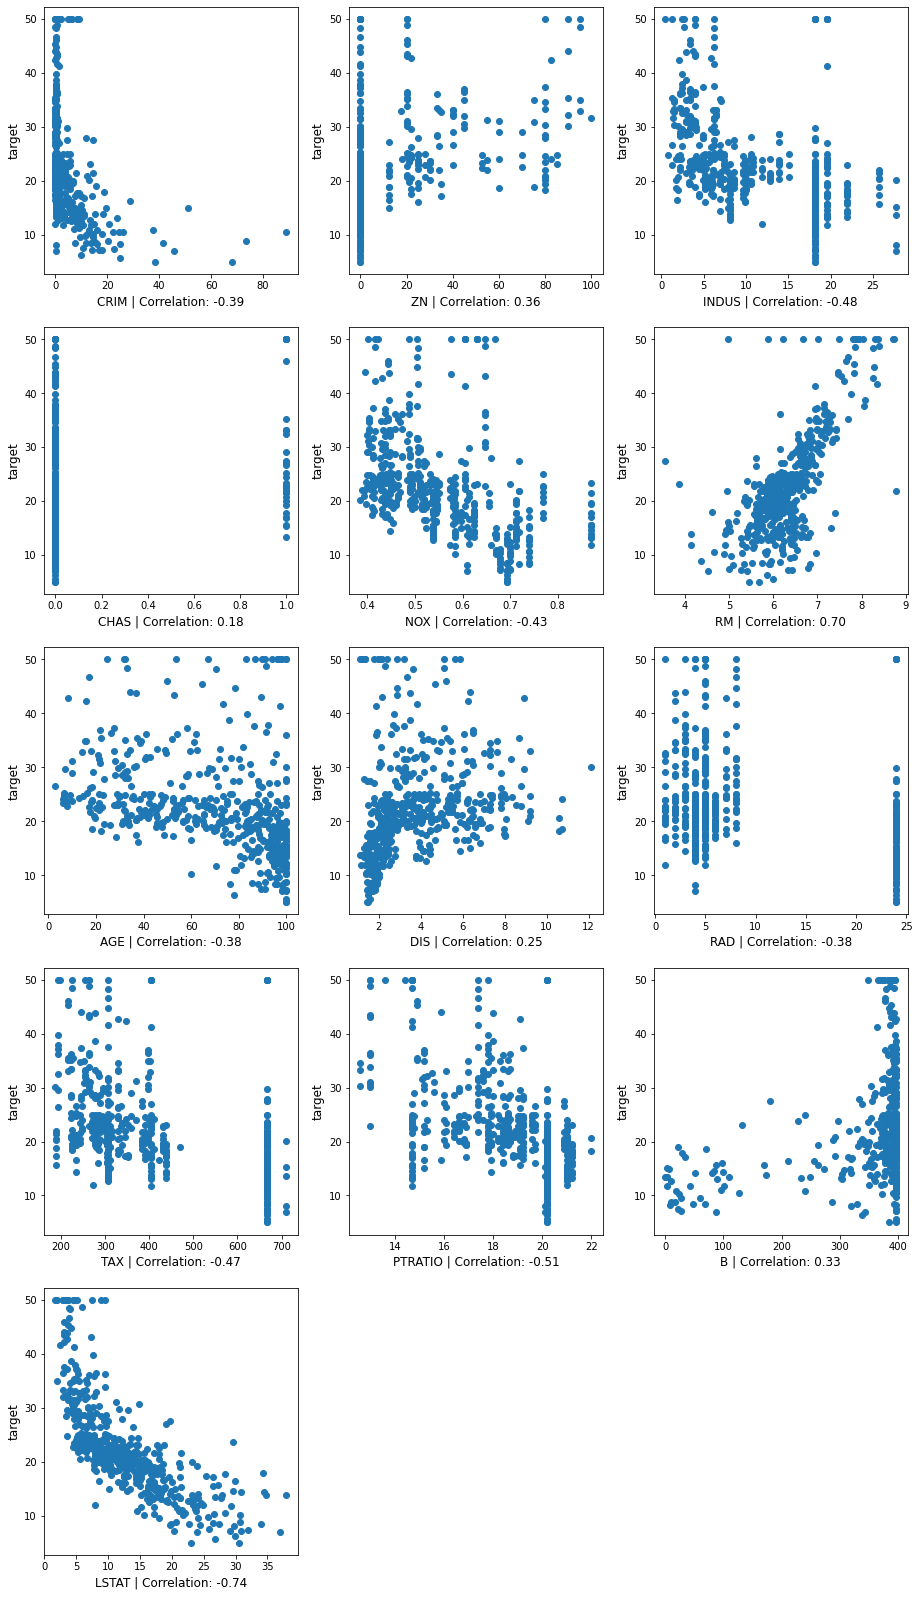

In [7]:
# correlation of each column with target

num_features = len(housing["feature_names"])
feature_names = housing["feature_names"]

label_font_size = 12

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

plt.subplots_adjust(left=0.5, top=1.2)

y = target[0].to_numpy()
y_mean = np.mean(y)
del_y = (y - y_mean)

for i in range(num_features):
    x = data[i].to_numpy()
    x_mean = np.mean(x)
    del_x = (x - x_mean)
    
    correlation = np.sum(del_x * del_y) / np.sqrt(np.sum(del_x**2) * np.sum(del_y**2))
    
    plt.subplot(num_features // 3 + 1, 3, i+1)
    plt.xlabel(f'{feature_names[i]} | Correlation: {correlation:.2f}\n', fontsize = label_font_size)
    plt.ylabel('target', fontsize = label_font_size)
    
    plt.scatter(x, y)
    
plt.show()

In [8]:
# Standardize and Splitting Dataset
data_mean = data.mean()
data_std = data.std()

data_standardized = (data - data_mean) / data_std

validation_fraction = 0.8

data['target'] = target[0]

train_encoder = []
validation_encoder = []


for i in range(len(data)):
    if (np.random.random() > validation_fraction):
        validation_encoder.append(i)
    else:
        train_encoder.append(i)

train_data = data.iloc[train_encoder].reset_index(drop=True)
validation_data = data.iloc[validation_encoder].reset_index(drop=True)

train_target = train_data[['target']].to_numpy()
validation_target = validation_data[['target']].to_numpy()

del train_data['target']
del validation_data['target']

train_data = train_data.to_numpy()
validation_data = validation_data.to_numpy()

In [34]:
# We will perform customized forward and backward propagation



# Define Abstract class
class Layer():
    def __init__(self, num_nodes, num_prev_layer_nodes):
        self.num_nodes = num_nodes
        self.prev_layer_num_nodes = num_prev_layer_nodes
        
        self.weights = np.random.rand(num_nodes, num_prev_layer_nodes)
        self.biases = np.random.rand(num_nodes, 1)
        
        self.z = None
        self.x = None
        self.back_gradient = None


# Define Fully connected Layer
class FCLayer(Layer):
    def __init__(self, num_nodes, num_prev_layer_nodes):
        super().__init__(num_nodes, num_prev_layer_nodes)
        
  # Forward Propagation
    def forward(self, X):
        self.x = X
        z = (X @ ((self.weights).T)) + self.biases.T
        return z

  # Backward Propagation
    def backward(self, output_gradient, lr=0.1):
        grad_w = (output_gradient.T) @ self.x
        grad_b = np.sum(output_gradient.T, axis=1, keepdims=True)
        grad_x = (output_gradient) @ self.weights
        
        # weight and bias update
        self.weights -= lr * grad_w
        self.biases -= lr * grad_b
        
        # updating gradient to be propagated to previous layer
        self.back_gradient = grad_x
        
        return grad_x


# Activation Layer (ReLU) 
class ActivationLayer(Layer):
    def __init__(self, num_nodes, activation_function, activation_function_derivative):
        super().__init__(num_nodes, num_nodes)
        self.weights = self.biases = None
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
            
    # Forward Propagation
    def forward(self, X):
        self.z = self.activation_function(X)
        return self.z

    # Backward Propagation
    def backward(self, output_gradient, lr=0.1):
        grad_x = output_gradient * self.activation_function_derivative(self.z)
        self.back_gradient = grad_x
        return grad_x

# Define activation function and its derivative

sigmoid = {
    "function": (lambda x: 1 / (1 + np.exp(-x))),
    "derivative": (lambda x: x*(1-x))
}

tanh = {
    "function": (lambda x: 1 - (2 / (np.exp(2*x) + 1))),
    "derivative": (lambda x: (1+x)*(1-x))
}

linear = {
    "function": (lambda x: x),
    "derivative": (lambda x: 1)
}

In [35]:
# Define Loss function (Use mean square error)

# y : output
# y_: target
mse = {
    "function": (lambda y, y_: np.sum((y-y_)**2) / 2),
    "derivative": (lambda y, y_: (y - y_))
}

In [40]:
# Implement Backpropagation
class MLP:
    def __init__(self, layers = [13, 15, 1], activations = [tanh, linear], loss = mse):
        self.loss = loss
        
        self.layers = []
        for i in range(len(layers) - 1):
            self.layers.append(
                FCLayer(layers[i+1], layers[i])
            )
            self.layers.append(
                ActivationLayer(layers[i+1], activations[i]["function"], activations[i]["derivative"])
            )
    
    def forward(self, X):
        z = X
        for i in self.layers:
            z = i.forward(z)
        
        return z
    
    def backward(self, y, y_, lr = 0.1):
        grad = self.loss["derivative"](y, y_)
        for i in self.layers[::-1]:
            grad = i.backward(grad, lr)
            
    def get_rms_loss(self, y, y_):
        return np.sqrt(self.loss["function"](y, y_) / len(y))
            
    def train(self, X, Y, lr = 0.1, batch_size = None):
        if (batch_size == None):
            batch_size = len(X)
            
        for i in range(0, len(X), batch_size):
            z = self.forward(X[i: i+batch_size])
            self.backward(z, Y[i: i+batch_size], lr)
            
        z = self.forward(X)
        return z
    
    def test(self, X, Y):
        z = self.forward(X)
        return self.get_rms_loss(z, Y)

In [47]:
# Training Network
epochs = int(15000)
update_frequency = int(1500)

nn_batch_tanh = MLP(layers = [13, 15, 1], activations = [tanh, linear], loss = mse)
nn_batch_sigmoid = MLP(layers = [13, 15, 1], activations = [sigmoid, linear], loss = mse)
nn_stochastic_tanh = MLP(layers = [13, 15, 1], activations = [tanh, linear], loss = mse)
nn_stochastic_sigmoid = MLP(layers = [13, 15, 1], activations = [sigmoid, linear], loss = mse)

loss_batch_tanh = []
loss_batch_sigmoid = []
loss_stochastic_tanh = []
loss_stochastic_sigmoid = []

print(f"\n\nBatch Gradient Descent with tanh")
for _ in range(epochs+1):
    y = nn_batch_tanh.train(train_data, train_target, 1e-7)
    l = nn_batch_tanh.get_rms_loss(y, train_target)
    loss_batch_tanh.append(l)
    if (_ % update_frequency == 0):
        print(f'RMS Loss at Iteration {_} ==> {l: 0.16f}')
        
print(f"\n\nBatch Gradient Descent with sigmoid")
for _ in range(epochs+1):
    y = nn_batch_sigmoid.train(train_data, train_target, 1e-7)
    l = nn_batch_sigmoid.get_rms_loss(y, train_target)
    loss_batch_sigmoid.append(l)
    if (_ % update_frequency == 0):
        print(f'RMS Loss at Iteration {_} ==> {l: 0.16f}')
        
print(f"\n\nStochastic Gradient Descent with tanh")
for _ in range(epochs+1):
    y = nn_stochastic_tanh.train(train_data, train_target, 1e-7, batch_size = 1)
    l = nn_stochastic_tanh.get_rms_loss(y, train_target)
    loss_stochastic_tanh.append(l)
    if (_ % update_frequency == 0):
        print(f'RMS Loss at Iteration {_} ==> {l: 0.16f}')
        
print(f"\n\nStochastic Gradient Descent with sigmoid")
for _ in range(epochs+1):
    y = nn_stochastic_sigmoid.train(train_data, train_target, 1e-7, batch_size = 1)
    l = nn_stochastic_sigmoid.get_rms_loss(y, train_target)
    loss_stochastic_sigmoid.append(l)
    if (_ % update_frequency == 0):
        print(f'RMS Loss at Iteration {_} ==> {l: 0.16f}')




Batch Gradient Descent with tanh
RMS Loss at Iteration 0 ==>  12.2854382864546228


/tmp/ipykernel_15799/3936470776.py:74: RuntimeWarning: overflow encountered in exp
  "function": (lambda x: 1 - (2 / (np.exp(2*x) + 1))),


RMS Loss at Iteration 1500 ==>  7.5899255810877060
RMS Loss at Iteration 3000 ==>  6.6622345820035580
RMS Loss at Iteration 4500 ==>  6.5201403972203380
RMS Loss at Iteration 6000 ==>  6.4997583272233843
RMS Loss at Iteration 7500 ==>  6.4968655747592257
RMS Loss at Iteration 9000 ==>  6.4964556467652663
RMS Loss at Iteration 10500 ==>  6.4963975691000124
RMS Loss at Iteration 12000 ==>  6.4963893410429590
RMS Loss at Iteration 13500 ==>  6.4963881753517070
RMS Loss at Iteration 15000 ==>  6.4963880102051554


Batch Gradient Descent with sigmoid
RMS Loss at Iteration 0 ==>  12.3984916026858532
RMS Loss at Iteration 1500 ==>  7.6159255485779696
RMS Loss at Iteration 3000 ==>  6.6664368389738948
RMS Loss at Iteration 4500 ==>  6.5207488798561695
RMS Loss at Iteration 6000 ==>  6.4998448063374603
RMS Loss at Iteration 7500 ==>  6.4968778320070868
RMS Loss at Iteration 9000 ==>  6.4964573833926798
RMS Loss at Iteration 10500 ==>  6.4963978151347970
RMS Loss at Iteration 12000 ==>  6.496389

KeyboardInterrupt: 

In [27]:
# Test the Model 

loss = nn.test(validation_data, validation_target)
print(f'Training Loss: {loss: .16f}')

Training Loss:  6.5222361369261082


In [ ]:
# Plots

In [ ]:
# Challenges and Observations


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [ ]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist

In [ ]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

In [ ]:
#Dataset Exploration

In [ ]:
# Model Structure 




In [ ]:
# Implement the loss (cross-entropy)

In [ ]:
# Compile and fit the model

In [ ]:
# Test the model

In [ ]:
# Plots

In [ ]:
# Challenges and observations